<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-02-19 23:04:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  37.2MB/s    in 0.9s    

2021-02-19 23:04:30 (37.2 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [111]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [115]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [116]:
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat less wel

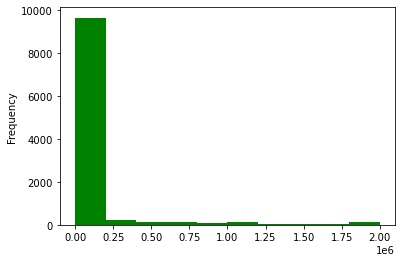

In [117]:
# your code goes here
df['ConvertedComp'].plot(kind='hist',color='green')

### Box Plots


Plot a box plot of `Age.`


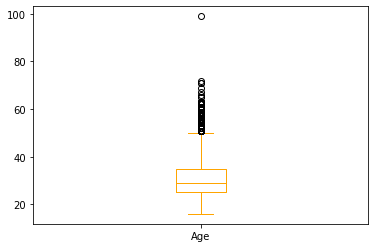

In [118]:
# your code goes here

df['Age'].plot(kind='box',color='orange')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


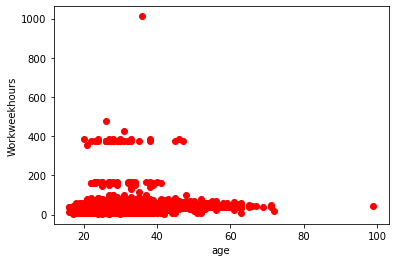

In [15]:
# your code goes here

plt.scatter(x=df['Age'],y=df['WorkWeekHrs'], color='red')
plt.xlabel("age")
plt.ylabel("Workweekhours")
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


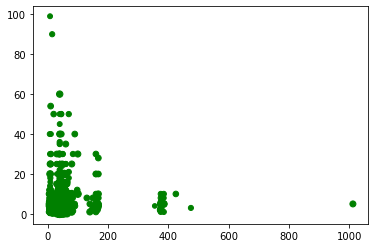

In [16]:
# your code goes here

plt.scatter(x=df['WorkWeekHrs'],y=df['CodeRevHrs'],s=df['Age'],c='green')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [56]:
# your code goes here
df2 = pd.read_sql("SELECT * FROM DatabaseWorkedWith", conn)

In [57]:
df2.columns

Index(['Respondent', 'DatabaseWorkedWith'], dtype='object')

In [58]:
df2

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite
...,...,...
31370,25137,MySQL
31371,25138,PostgreSQL
31372,25141,Microsoft SQL Server
31373,25141,Redis


In [60]:
df2.groupby("Respondent").count()

,DatabaseWorkedWith
Respondent,
4,2
9,3
13,4
16,3
17,2
...,...
25136,1
25137,1
25138,1


In [61]:

df2[df2["DatabaseWorkedWith"].str.contains("SQL")]

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
3,9,PostgreSQL
4,9,SQLite
8,13,MySQL
...,...,...
31369,25136,Microsoft SQL Server
31370,25137,MySQL
31371,25138,PostgreSQL
31372,25141,Microsoft SQL Server


In [62]:
df2[df2["DatabaseWorkedWith"].str.contains("MySQL")]


,Respondent,DatabaseWorkedWith
0,4,MySQL
8,13,MySQL
11,16,MySQL
17,19,MySQL
24,22,MySQL
...,...,...
31336,25111,MySQL
31342,25120,MySQL
31356,25124,MySQL
31366,25134,MySQL


In [24]:
df2.groupby("DatabaseWorkedWith").count()

,Respondent
DatabaseWorkedWith,
Cassandra,397
Couchbase,250
DynamoDB,831
Elasticsearch,1954
Firebase,1314
MariaDB,1709
Microsoft SQL Server,4110
MongoDB,3016
MySQL,5469


In [63]:
y = pd.DataFrame(df2.groupby("DatabaseWorkedWith").count())

In [64]:
y

,Respondent
DatabaseWorkedWith,
Cassandra,397
Couchbase,250
DynamoDB,831
Elasticsearch,1954
Firebase,1314
MariaDB,1709
Microsoft SQL Server,4110
MongoDB,3016
MySQL,5469


In [65]:
y.sort_values(by="Respondent", ascending=False)

,Respondent
DatabaseWorkedWith,
MySQL,5469
Microsoft SQL Server,4110
PostgreSQL,4097
SQLite,3248
MongoDB,3016
Redis,2508
Elasticsearch,1954
Oracle,1744
MariaDB,1709


In [66]:
y = y.nlargest(5,"Respondent")

In [67]:
y

,Respondent
DatabaseWorkedWith,
MySQL,5469
Microsoft SQL Server,4110
PostgreSQL,4097
SQLite,3248
MongoDB,3016


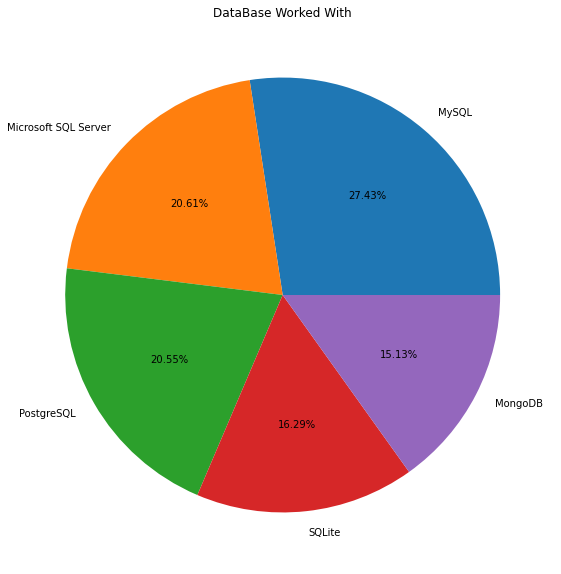

In [69]:
plt.figure(figsize=(10,10))
plt.pie(y.Respondent, labels=['MySQL','Microsoft SQL Server','PostgreSQL','SQLite','MongoDB'],
       autopct='%.2f%%')
plt.title("DataBase Worked With")
plt.show()

In [70]:
df3 = pd.read_sql("SELECT * FROM DatabaseDesireNextYear", conn)

In [73]:
df3

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite
...,...,...
29570,25141,Elasticsearch
29571,25141,MongoDB
29572,25141,Microsoft SQL Server
29573,25141,Redis


In [74]:
df3.groupby("DatabaseDesireNextYear").count()


,Respondent
DatabaseDesireNextYear,
Cassandra,1003
Couchbase,390
DynamoDB,1044
Elasticsearch,2856
Firebase,1650
MariaDB,1385
Microsoft SQL Server,2706
MongoDB,3649
MySQL,3281


In [75]:
top5desire = pd.DataFrame(df3.groupby("DatabaseDesireNextYear").count())

In [76]:
top5desire = top5desire.nlargest(5,"Respondent")

In [77]:
top5desire

,Respondent
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856


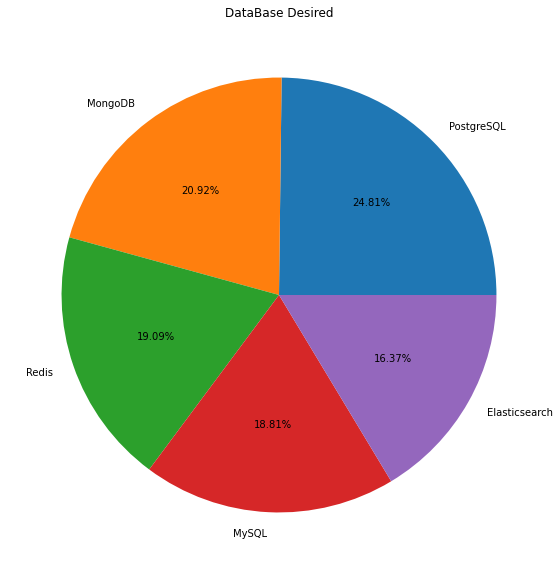

In [78]:
plt.figure(figsize=(10,10))
plt.pie(top5desire.Respondent, labels=['PostgreSQL','MongoDB','Redis','MySQL','Elasticsearch'],
       autopct='%.2f%%')
plt.title("DataBase Desired")
plt.show()

In [79]:
df4 = pd.read_sql("SELECT * FROM LanguageDesireNextYear", conn)

In [80]:
df4

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell
...,...,...
55759,25142,Bash/Shell/PowerShell
55760,25142,C
55761,25142,C++
55762,25142,Python


In [81]:
df4.groupby("LanguageDesireNextYear").count()

,Respondent
LanguageDesireNextYear,
Assembly,336
Bash/Shell/PowerShell,3097
C,1028
C#,3591
C++,1633
Clojure,413
Dart,610
Elixir,620
Erlang,310


In [82]:
top5langdesired = pd.DataFrame(df4.groupby("LanguageDesireNextYear").count())

In [83]:
top5langdesired

,Respondent
LanguageDesireNextYear,
Assembly,336
Bash/Shell/PowerShell,3097
C,1028
C#,3591
C++,1633
Clojure,413
Dart,610
Elixir,620
Erlang,310


In [84]:
top5langdesired.nlargest(5,"Respondent")

,Respondent
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [119]:
# your code goes here
df.WorkWeekHrs.median()

40.0

In [120]:
df.CodeRevHrs.median()

4.0

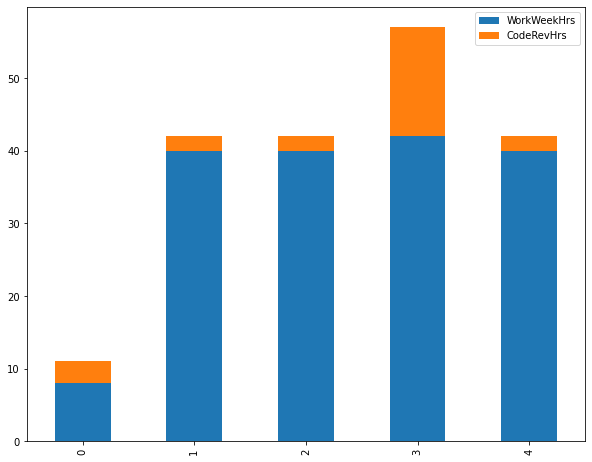

In [131]:
QUERY="""
SELECT WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35 LIMIT 5"""

df2=pd.read_sql_query(QUERY,conn)
df2[['WorkWeekHrs','CodeRevHrs']].plot(kind='bar',stacked=True,figsize=[10,8])

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [133]:
# your code goes here
age2 = df[(df["Age"] >= 45.0) & (df["Age"] <= 60.0)]

In [135]:
age2.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
7,22,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,47.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
50,111,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers,54.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
66,144,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed part-time,Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",...,Somewhat less welcome now than last year,Courses on technologies you're interested in,47.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
75,164,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Industry news about technologies you're intere...,47.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
93,202,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Canada,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Courses on technologies you're interested in,45.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy


In [136]:

age2.ConvertedComp

7        103000.0
50            NaN
66        54996.0
75        62807.0
93        72522.0
           ...   
11342     76339.0
11345     68705.0
11350    300000.0
11372     87668.0
11373     59652.0
Name: ConvertedComp, Length: 599, dtype: float64

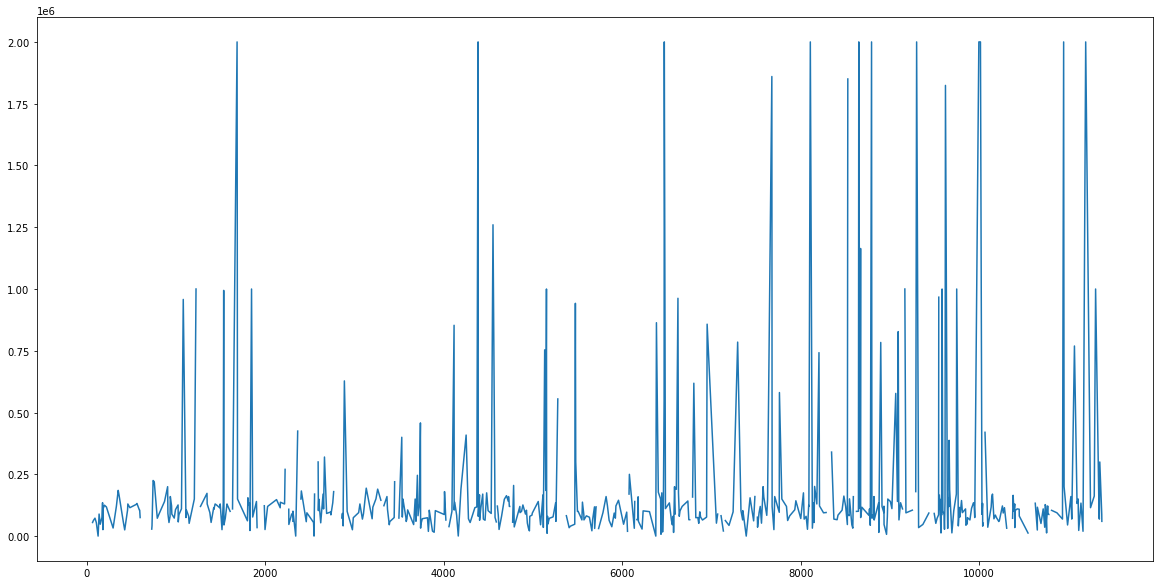

In [141]:
age2.ConvertedComp.plot(figsize=(20,10))
plt.show()

In [148]:
age3 = df[(df["Age"] >= 25.0) & (df["Age"] <= 30.0)]

In [149]:
age3

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
16,43,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Spain,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,27.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,No,Too long,Easy
24,60,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Secondary school (e.g. American high school, G...",NaN,...,NaN,Industry news about technologies you're intere...,27.0,Man,No,Bisexual,White or of European descent,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11389,25125,I am a developer by profession,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Italy,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
11390,25128,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,"Yes, part-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,26.0,Man,No,Straight / Heterosexual,South Asian,Yes,Appropriate in length,Easy
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat less welcome now than last year,NaN,25.0,Man,No,Strai

In [150]:

age3.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.006331,-0.009882,-0.020475,0.009548,-0.032112
CompTotal,-0.006331,1.000000,-0.038309,0.005882,0.059431,0.009860
ConvertedComp,-0.009882,-0.038309,1.000000,0.013116,-0.047305,0.062748
WorkWeekHrs,-0.020475,0.005882,0.013116,1.000000,0.009821,0.023527
CodeRevHrs,0.009548,0.059431,-0.047305,0.009821,1.000000,-0.003597
Age,-0.032112,0.009860,0.062748,0.023527,-0.003597,1.000000


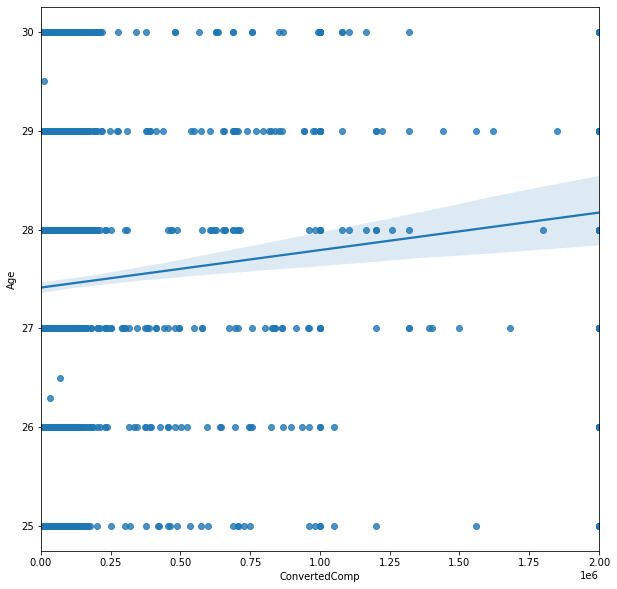

In [151]:
plt.figure(figsize=(10,10))
sns.regplot(x=age3.ConvertedComp,y=age3.Age)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [142]:
# your code goes here

df.MainBranch.value_counts()

I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
Name: MainBranch, dtype: int64

In [144]:

w = pd.DataFrame(df.MainBranch.value_counts())

In [145]:
w

,MainBranch
I am a developer by profession,10618
"I am not primarily a developer, but I write code sometimes as part of my work",780


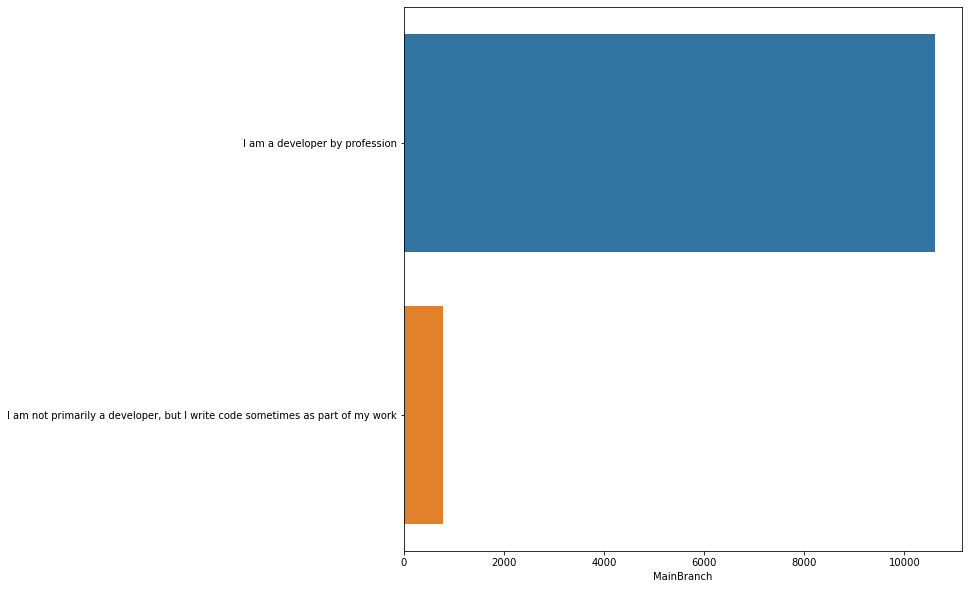

In [147]:
plt.figure(figsize=(10,10))
sns.barplot(x=w.MainBranch,y=w.index, orient='h')
plt.show()

In [152]:
df5 = pd.read_sql("SELECT * FROM DevType", conn)

In [153]:
df5

,Respondent,DevType
0,4,"Developer, full-stack"
1,9,Database administrator
2,9,"Developer, back-end"
3,9,"Developer, front-end"
4,9,"Developer, full-stack"
...,...,...
35309,25141,"Developer, mobile"
35310,25141,"Engineer, data"
35311,25141,"Engineer, site reliability"
35312,25141,System administrator


In [154]:
df5[df5["DevType"].str.contains("full-stack", regex=False)]

,Respondent,DevType
0,4,"Developer, full-stack"
4,9,"Developer, full-stack"
12,13,"Developer, full-stack"
20,16,"Developer, full-stack"
23,17,"Developer, full-stack"
...,...,...
35261,25122,"Developer, full-stack"
35269,25133,"Developer, full-stack"
35279,25134,"Developer, full-stack"
35292,25136,"Developer, full-stack"


In [155]:
df5[df5["DevType"].str.contains("back-end")]

,Respondent,DevType
2,9,"Developer, back-end"
9,13,"Developer, back-end"
21,17,"Developer, back-end"
28,20,"Developer, back-end"
36,22,"Developer, back-end"
...,...,...
35276,25134,"Developer, back-end"
35289,25136,"Developer, back-end"
35296,25137,"Developer, back-end"
35298,25138,"Developer, back-end"


In [156]:
df5[df5["DevType"].str.contains("front-end")]

,Respondent,DevType
3,9,"Developer, front-end"
11,13,"Developer, front-end"
22,17,"Developer, front-end"
30,20,"Developer, front-end"
38,22,"Developer, front-end"
...,...,...
35256,25120,"Developer, front-end"
35262,25123,"Developer, front-end"
35278,25134,"Developer, front-end"
35291,25136,"Developer, front-end"


In [157]:
df5[df5["DevType"].str.contains("Developer, mobile")]


,Respondent,DevType
13,13,"Developer, mobile"
32,20,"Developer, mobile"
54,26,"Developer, mobile"
72,43,"Developer, mobile"
104,61,"Developer, mobile"
...,...,...
35253,25118,"Developer, mobile"
35263,25124,"Developer, mobile"
35265,25128,"Developer, mobile"
35280,25134,"Developer, mobile"


Close the database connection.


In [158]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
